In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import warnings
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [73]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [74]:
#Let's fix the the labels
df['season'] = df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df['yr'] = df['yr'].map({0:2018, 1:2019})
df['weathersit'] = df['weathersit'].map({1:'Clear', 2:'Mist + Cloudy', 3:'Light Snow/Rain', 4:'Heavy Rain/Ice Pallets'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,2018,1,0,6,0,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,2018,1,0,0,0,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,2018,1,0,1,1,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,2018,1,0,2,1,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,2018,1,0,3,1,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


<AxesSubplot:>

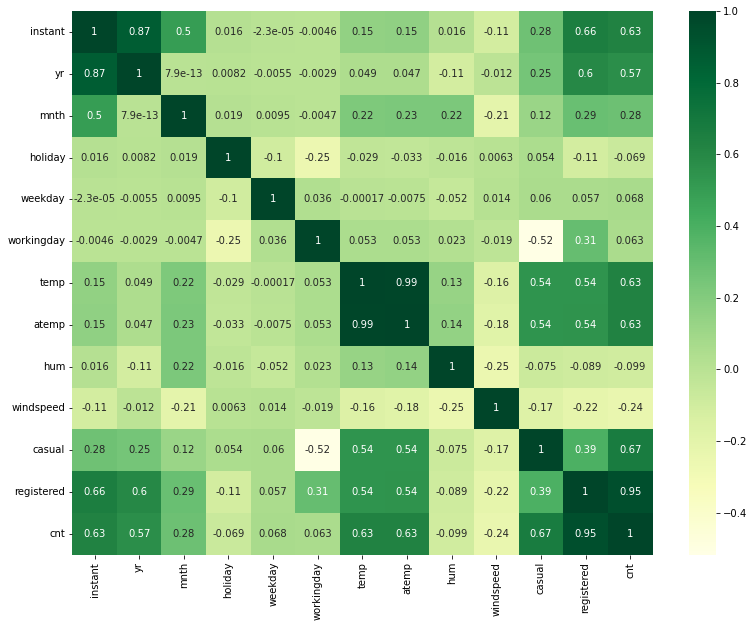

In [75]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(), annot=True, cmap='YlGn')

In [76]:
#Drop unecessary columns
df.drop(columns=['instant',	'dteday', 'temp', 'casual', 'registered'], inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,2018,1,0,6,0,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,spring,2018,1,0,0,0,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,spring,2018,1,0,1,1,Clear,9.47025,43.7273,16.636703,1349
3,spring,2018,1,0,2,1,Clear,10.60610,59.0435,10.739832,1562
4,spring,2018,1,0,3,1,Clear,11.46350,43.6957,12.522300,1600


In [77]:
#Check if null
df.isna().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

<AxesSubplot:xlabel='atemp'>

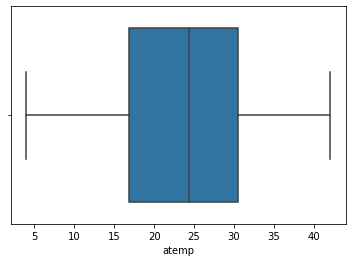

In [78]:
#Univariate Anlysis
sns.boxplot(df['atemp'])

<AxesSubplot:xlabel='hum'>

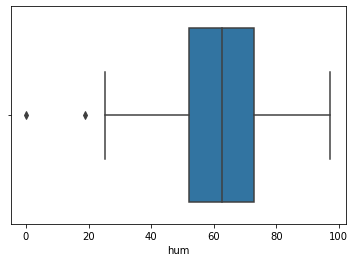

In [79]:
sns.boxplot(df['hum'])

In [80]:
#Let's drop the outliers
IQR = np.percentile(df['hum'], 75) - np.percentile(df['hum'], 25)
lower_limt = np.percentile(df['hum'], 25) - (1.5*IQR)
upper_limt = np.percentile(df['hum'], 75) + (1.5*IQR)
df = df[(df['hum'] <= upper_limt) & (df['hum'] >= lower_limt)]

<AxesSubplot:xlabel='windspeed'>

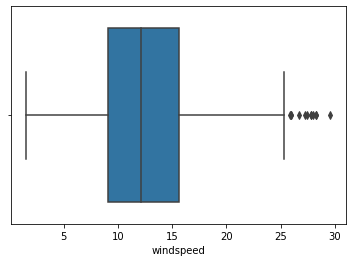

In [81]:
sns.boxplot(df['windspeed'])

In [82]:
#Let's drop the outliers
IQR = np.percentile(df['windspeed'], 75) - np.percentile(df['windspeed'], 25)
lower_limt = np.percentile(df['windspeed'], 25) - (1.5*IQR)
upper_limt = np.percentile(df['windspeed'], 75) + (1.5*IQR)
df = df[(df['windspeed'] <= upper_limt) & (df['windspeed'] >= lower_limt)]

<AxesSubplot:xlabel='season', ylabel='cnt'>

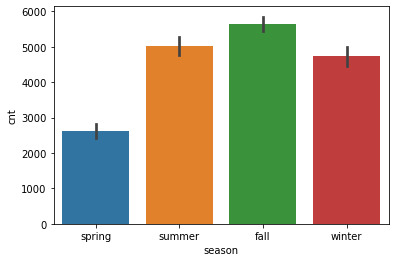

In [83]:
#Bivariate Analysis
sns.barplot(data=df, x='season', y='cnt')

In [84]:
#In fall customers like to rent bicycles compared to other seasons

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

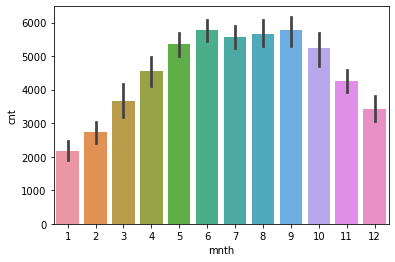

In [85]:
sns.barplot(data=df, x='mnth', y='cnt')

<AxesSubplot:xlabel='holiday', ylabel='cnt'>

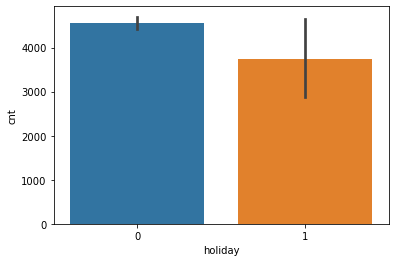

In [86]:
sns.barplot(data=df, x='holiday', y='cnt')

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

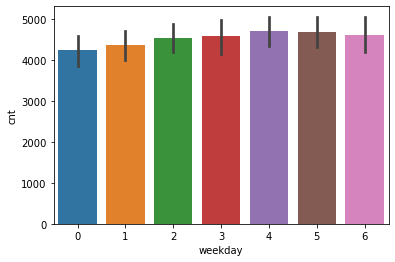

In [87]:
sns.barplot(data=df, x='weekday', y='cnt')

In [88]:
#There is no any relation between weekday and cnt. So we can drop this column
df.drop(columns=['weekday'], inplace=True)

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

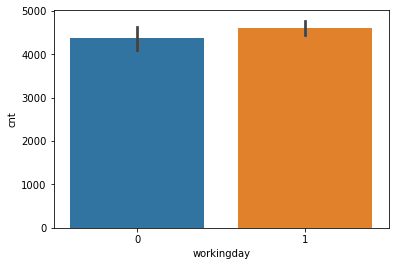

In [89]:
sns.barplot(data=df, x='workingday', y='cnt')

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

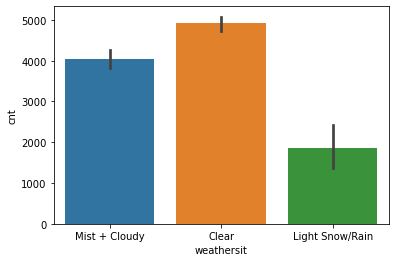

In [90]:
sns.barplot(data=df, x='weathersit', y='cnt')

<AxesSubplot:xlabel='atemp', ylabel='cnt'>

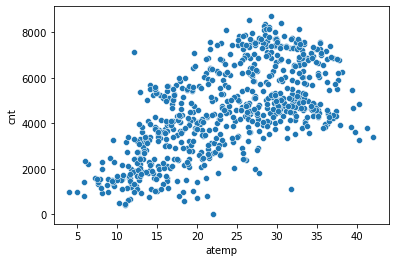

In [92]:
sns.scatterplot(data=df, x='atemp', y='cnt')

<AxesSubplot:xlabel='windspeed', ylabel='cnt'>

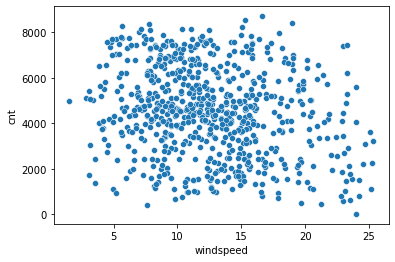

In [94]:
sns.scatterplot(data=df, x='windspeed', y='cnt')

<AxesSubplot:xlabel='hum', ylabel='cnt'>

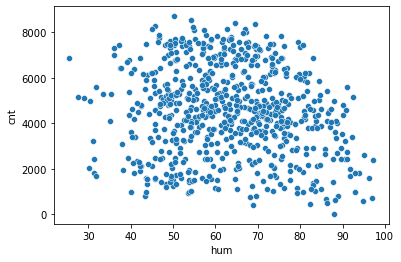

In [95]:
sns.scatterplot(data=df, x='hum', y='cnt')

In [44]:
# Split feature and target variables
y = df.pop('cnt')
X = df

In [45]:
#Create dummy variables
season = pd.get_dummies(X['season'], drop_first=True)
mnth = pd.get_dummies(X['mnth'], drop_first=True)
weathersit = pd.get_dummies(X['weathersit'], drop_first=True)

In [46]:
# concat with dummy one with original df
X = pd.concat([X, season, mnth, weathersit], axis=1)
X.head()

,season,yr,mnth,holiday,workingday,weathersit,atemp,hum,windspeed,spring,...,5,6,7,8,9,10,11,12,Light Snow/Rain,Mist + Cloudy
0,spring,2018,1,0,0,Mist + Cloudy,18.18125,80.5833,10.749882,1,...,0,0,0,0,0,0,0,0,0,1
1,spring,2018,1,0,0,Mist + Cloudy,17.68695,69.6087,16.652113,1,...,0,0,0,0,0,0,0,0,0,1
2,spring,2018,1,0,1,Clear,9.47025,43.7273,16.636703,1,...,0,0,0,0,0,0,0,0,0,0
3,spring,2018,1,0,1,Clear,10.60610,59.0435,10.739832,1,...,0,0,0,0,0,0,0,0,0,0
4,spring,2018,1,0,1,Clear,11.46350,43.6957,12.522300,1,...,0,0,0,0,0,0,0,0,0,0


In [47]:
#Drop the old categorical columns
X.drop(columns=['season', 'weathersit', 'mnth'], inplace=True)
X.head()

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,2,...,5,6,7,8,9,10,11,12,Light Snow/Rain,Mist + Cloudy
0,2018,0,0,18.18125,80.5833,10.749882,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2018,0,0,17.68695,69.6087,16.652113,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,2018,0,1,9.47025,43.7273,16.636703,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2018,0,1,10.60610,59.0435,10.739832,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,0,1,11.46350,43.6957,12.522300,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
#Split into train test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [49]:
#Scale the features
scaler = MinMaxScaler()
num_vars = ['atemp', 'hum', 'windspeed']
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [50]:
#Train Model Using RFE

In [51]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=16)
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 6),
 ('winter', True, 1),
 (2, False, 5),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, False, 7),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, False, 2),
 (12, False, 3),
 ('Light Snow/Rain', True, 1),
 ('Mist + Cloudy', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index([             'yr',         'holiday',           'atemp',
                   'hum',       'windspeed',          'spring',
                'winter',                 3,                 4,
                       5,                 6,                 8,
                       9,                10, 'Light Snow/Rain',
         'Mist + Cloudy'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 2, 7, 11, 12], dtype='object')

In [55]:
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()

In [56]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     182.6
Date:                Wed, 14 Sep 2022   Prob (F-statistic):          6.47e-209
Time:                        11:03:15   Log-Likelihood:                -4614.2
No. Observations:                 572   AIC:                             9262.
Df Residuals:                     555   BIC:                             9336.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -4.087e+06   1.34e+05    -30.390      0.000   -4.35e+06   -3.82e+06
yr               2026.4170     66.622     30.416      0.000    1895.554    2157.280
holiday          -612.1873    194.369     -3.150      0.002    -993.975    -230.399
atemp            3646.9238    280.462     13.003      0.000    3096.026    4197.822
hum             -1225.4198    250.537     -4.891      0.000   -1717.536    -733.303
windspeed        -769.4276    175.643     -4.381      0.000   -1114.433    -424.422
spring           -905.0045    159.386     -5.678      0.000   -1218.077    -591.932
winter            535.3181    146.458      3.655      0.000     247.638     822.999
3                 498.7173    135.034      3.693      0.000     233.477     763.957
4                 424.7042    157.380      2.699      0.007     115.571     733.838
5                 746.4575    147.803      5.050      0.000     456.136    1036.779
6                 586.0131    148.677      3.942      0.000     293.975     878.051
8                 478.4446    147.918      3.235      0.001     187.897     768.993
9                1126.1230    138.889      8.108      0.000     853.311    1398.935
10                677.7197    144.469      4.691      0.000     393.947     961.493
Light Snow/Rain -1944.6073    243.787     -7.977      0.000   -2423.465   -1465.750
Mist + Cloudy    -428.4101     90.211     -4.749      0.000    -605.608    -251.212
==============================================================================
Omnibus:                       87.366   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              196.786
Skew:                          -0.823   Prob(JB):                     1.86e-43
Kurtosis:                       5.356   Cond. No.                     8.29e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.29e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
#Predict
X_test_rfe = X_test[col]
X_test_sm = sm.add_constant(X_test_rfe)
y_test_pred = lm.predict(X_test_sm)

In [58]:
#Evaluate
r2_score(y_test, y_test_pred)

0.8377886885190624

<AxesSubplot:ylabel='Density'>

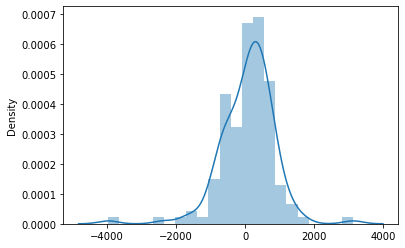

In [99]:
#Residual Analysis
res = y_test-y_test_pred
sns.distplot(res)

In [100]:
#Erros are normally distributed

In [97]:
lm.params

const             -4.086783e+06
yr                 2.026417e+03
holiday           -6.121873e+02
atemp              3.646924e+03
hum               -1.225420e+03
windspeed         -7.694276e+02
spring            -9.050045e+02
winter             5.353181e+02
3                  4.987173e+02
4                  4.247042e+02
5                  7.464575e+02
6                  5.860131e+02
8                  4.784446e+02
9                  1.126123e+03
10                 6.777197e+02
Light Snow/Rain   -1.944607e+03
Mist + Cloudy     -4.284101e+02
dtype: float64